In [48]:
import pandas as pd
# import re
# import numpy as np
# import matplotlib.pyplot as plt
import pygal 
# from svglib.svglib import svg2rlg
# from reportlab.graphics import renderPDF, renderPM
import os
import cairosvg
from numbers import Number

In [2]:
df = pd.read_csv('cabal.csv', encoding = "cp1252")

In [5]:
# df.tail()

In [105]:
# df[df['headline'].str.lower().str.contains(("seed funding|seed round|seed capital"))]
# df[df['headline'].str.lower().str.contains(("(?x)usd | USD"))]

### All steps in a function

In [6]:
def stabilize(df):
    df['date'] = pd.to_datetime(df['date'])
    df['months'] = df['date'].apply(lambda x: x.strftime('%Y-%m')) 
    df['count'] = 1    

In [7]:
stabilize(df)

In [8]:
funding = df[df['headline'].str.lower().str.contains('raises|raised|raising|secures|closes|secured|closed')]
acquisition = df[df['headline'].str.lower().str.contains(("acquiring|acquired|acquiring|acquires"))]

In [9]:
# chart = df.groupby('months', as_index=False)['date'].count()
# line_chart = pygal.Line(x_label_rotation=20, show_minor_x_labels=False)
# line_chart.title = 'title'
# line_chart.x_labels = map(str, chart['months'])
# line_chart.x_labels_major = [chart['months'][0], chart['months'][10], chart['months'][20], chart['months'][30], chart['months'][40], chart['months'][50], chart['months'][57], chart['months'][65]]
# line_chart.add('',chart['date'])
# display({'image/svg+xml': line_chart.render()}, raw=True)

In [10]:
path = './Output'
os.chdir(path)

In [11]:
def createChart(df, title, fileName):
    chart = df.groupby('months', as_index=False)['date'].count()
    l = int(len(chart)/7)
    line_chart = pygal.Line(x_label_rotation=20, show_minor_x_labels=False)
    line_chart.title = title
    line_chart.x_labels = map(str, chart['months'])
    line_chart.x_labels_major = [chart['months'][0], chart['months'][l], chart['months'][l+l], chart['months'][l+l+l], chart['months'][l+l+l+l], chart['months'][l+l+l+l+l], chart['months'][l+l+l+l+l+l], chart['months'][len(chart) - 1]]
    line_chart.add('', chart['date'])
    
    line_chart.render_to_png( fileName + '.png')
    
#     drawing = svg2rlg('draws.svg')
#     renderPM.drawToFile(drawing, 'rer.png')
    display({'image/svg+xml': line_chart.render()}, raw=True)

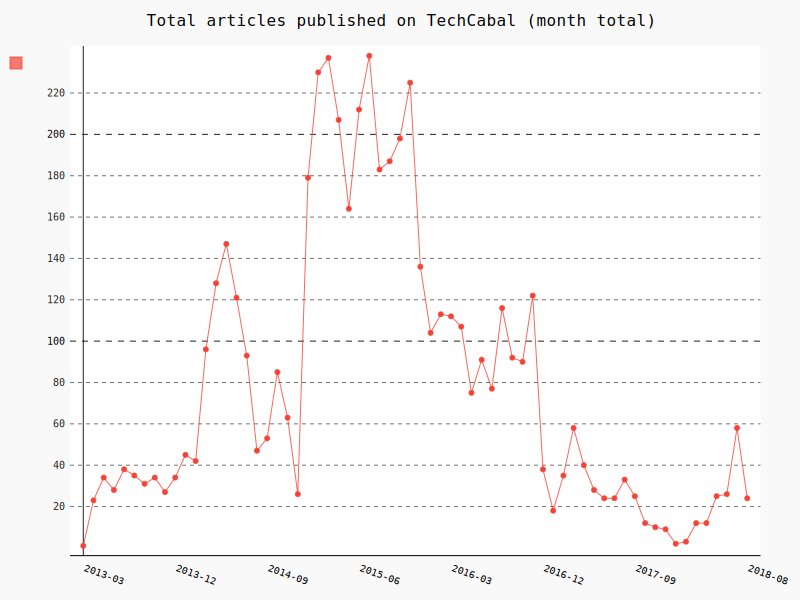

In [13]:
createChart(df, 'Total articles published on TechCabal (month total)', 'Total Articles Cabal' )

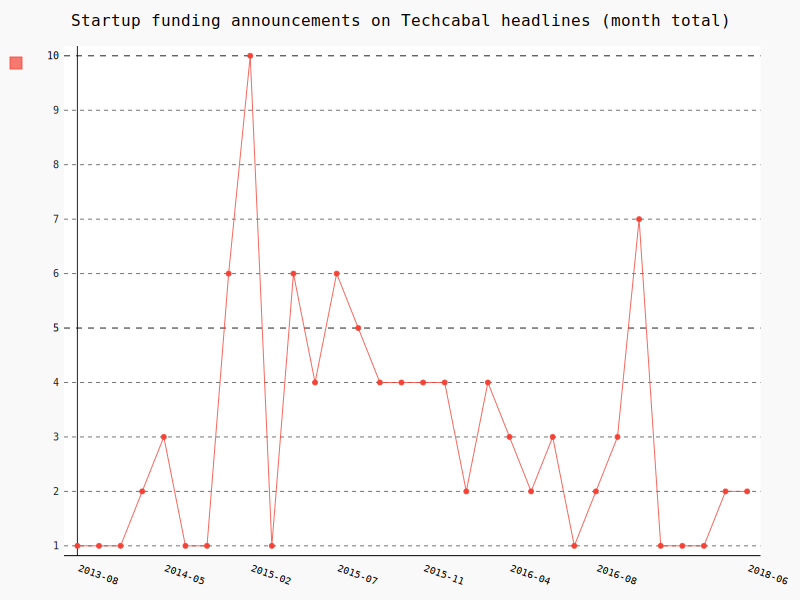

In [16]:
createChart(funding, 'Startup funding announcements on Techcabal headlines (month total)', 'funding announcement Cabal ')

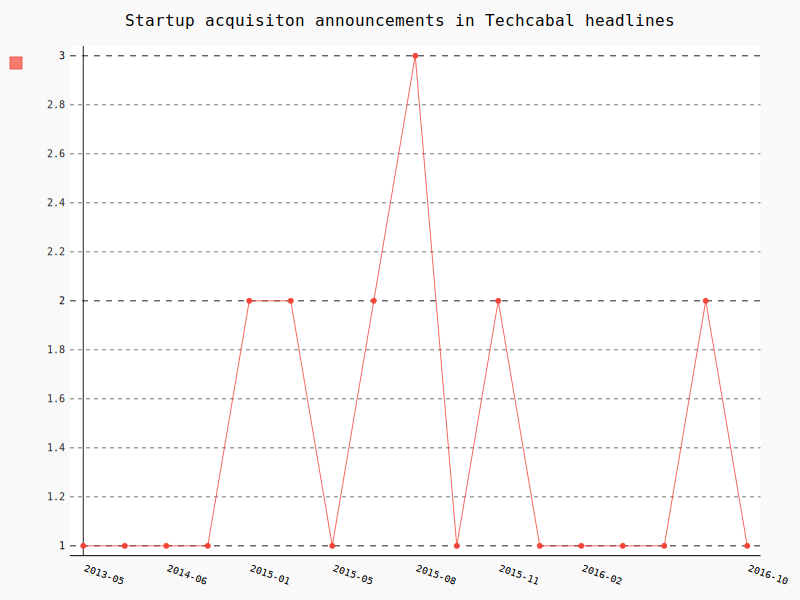

In [384]:
createChart(acquisition, 'Startup acquisiton announcements in Techcabal headlines', '')

In [14]:
spons = df[df['sponsored'] == True]

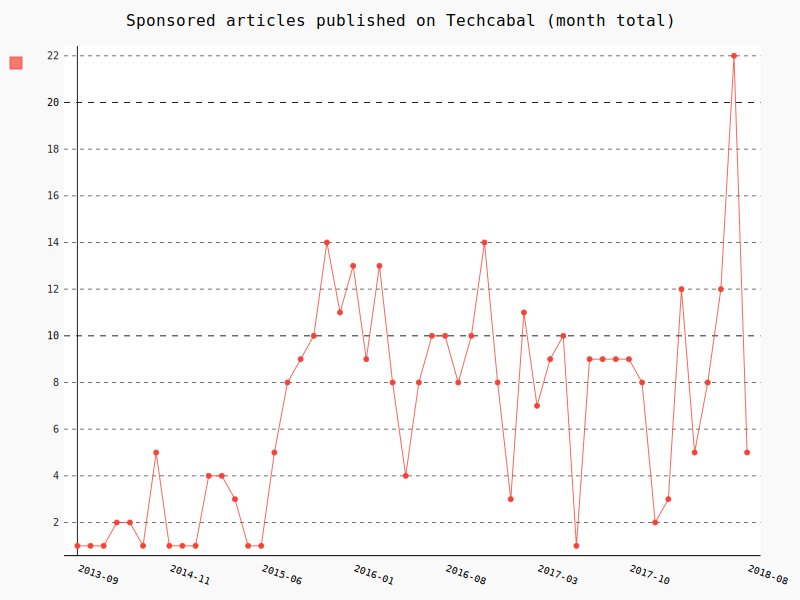

In [17]:
createChart(spons, 'Sponsored articles published on Techcabal (month total)', 'sponsored article cabal')

## Other Analysis

In [215]:
df['months'].values

array(['2018-08', '2018-08', '2018-08', ..., '2013-04', '2013-04',
       '2013-03'], dtype=object)

##### Highest no of article churned out per month

In [499]:
df.groupby('months', as_index=False)['count'].count()['count'].max()

238

##### Published articles by year

In [517]:
lo = df.groupby('months', as_index=False)['date'].count()

In [18]:
df.groupby(df.date.dt.year)['count'].sum()

date
2013     285
2014     946
2015    2396
2016    1137
2017     316
2018     162
Name: count, dtype: int64

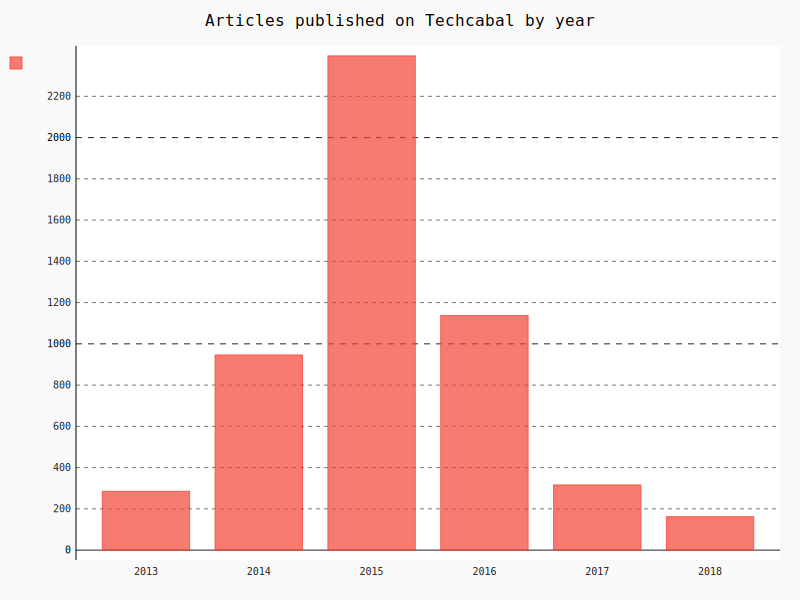

In [19]:
bar_chart = pygal.Bar()
bar_chart.title = 'Articles published on Techcabal by year'
bar_chart.x_labels = map(str, range(2013, 2019))
bar_chart.add('', [285, 946, 2396, 1137, 316, 162])
display({'image/svg+xml': bar_chart.render()}, raw=True)
bar_chart.render_to_png('year articles.png')

In [576]:
amount = funding[funding['headline'].str.lower().str.contains('million')]

In [580]:
amount.head()

,Unnamed: 0,date,headline,sponsored,months,count
173,173,2017-10-16,"Building the future, with Kendall Ananyi: reac...",False,2017-10,1
292,292,2017-05-24,Frontier Car Group Closes $22 Million Investment,False,2017-05,1
496,496,2016-12-07,African Tech Roundup: Zebra Cabs Raises $21.6 ...,False,2016-12,1
514,514,2016-11-29,South Africa’s Zebra Cabs has raised $21.5 mil...,False,2016-11,1
546,546,2016-11-22,African Tech Roundup: Kenyan agritech startup ...,False,2016-11,1


##### Percent of sponsored articles to all articles

In [40]:
groupedSpons = spons.groupby('months', as_index=False)['sponsored'].count()
groupedAll = df.groupby('months', as_index=False)['date'].count()
merged = groupedAll.merge(groupedSpons, on='months')
merged['percent'] = merged['sponsored'] / merged['date']

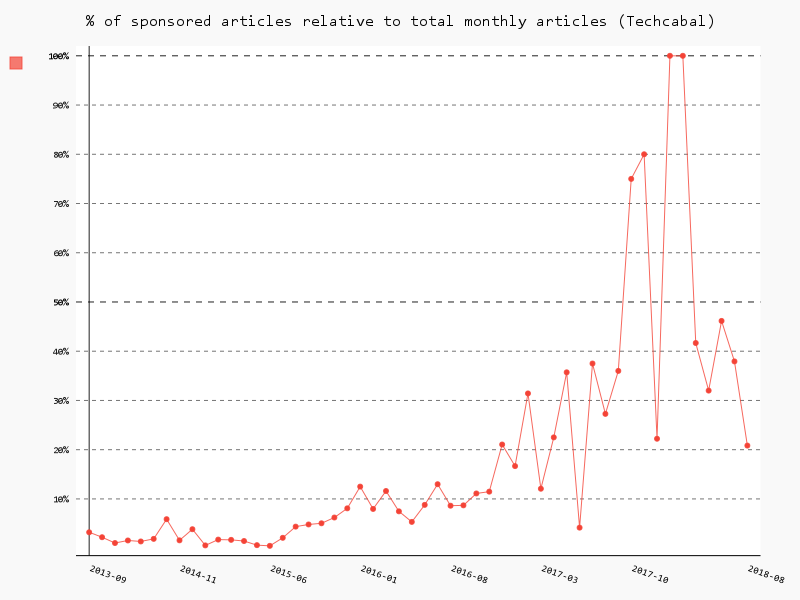

In [93]:
line_chart = pygal.Line(x_label_rotation=20, show_minor_x_labels=False)
l = int(len(merged)/7)
line_chart.title = '% of sponsored articles relative to total monthly articles (Techcabal)'
line_chart.y_labels = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
line_chart.x_labels = map(str, merged['months'])
line_chart.x_labels_major = [merged['months'][0], merged['months'][l], merged['months'][l+l], merged['months'][l+l+l], merged['months'][l+l+l+l], merged['months'][l+l+l+l+l], merged['months'][l+l+l+l+l+l], merged['months'][len(merged) - 1]]
line_chart.add('',merged['percent'])
# line_chart.render_to_png( 'percent of sponsored cabal.png')

In [84]:
merged.tail(10)

,months,date,sponsored,percent,percent prop
42,2017-10,12,9,0.750000,75%
43,2017-11,10,8,0.800000,80%
44,2017-12,9,2,0.222222,22%
45,2018-02,3,3,1.000000,100%
46,2018-03,12,12,1.000000,100%
47,2018-04,12,5,0.416667,42%
48,2018-05,25,8,0.320000,32%
49,2018-06,26,12,0.461538,46%
50,2018-07,58,22,0.379310,38%
51,2018-08,24,5,0.208333,21%


In [55]:
# def asPercent(v, precision='0.0'):  
#     """Convert number to percentage string."""
#     if isinstance(v, Number):
#         return "{{:{}%}}".format(precision).format(v)
#     else:
#         raise TypeError("Numeric type required")

In [58]:
# merged['percent prop'] = merged['percent'].apply(asPercent)

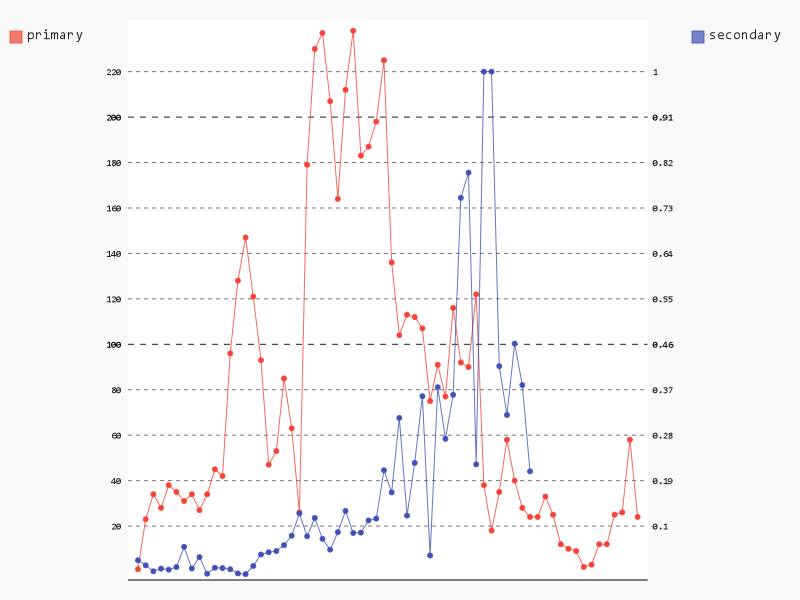

In [94]:
la = df.groupby('months', as_index=False)['date'].count()
chart = pygal.Line(secondary_range=(0.1, 1))
chart.add('primary', la['date'])
chart.add('secondary', merged['percent'], secondary=True)

In [92]:
# li

In [ ]:
# https://techcabal.com/2015/02/16/
# https://techcabal.com/2015/02/10/
